In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv(('/content/drive/MyDrive/Dataset_challenge.csv'), na_values=['NA'])

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Số lượng mẫu trong mỗi lớp sau khi áp dụng SMOTE:
 Outcome
1    500
0    500
Name: count, dtype: int64

Tỷ lệ phần trăm của mỗi lớp sau khi áp dụng SMOTE:
 Outcome
1    50.0
0    50.0
Name: proportion, dtype: float64


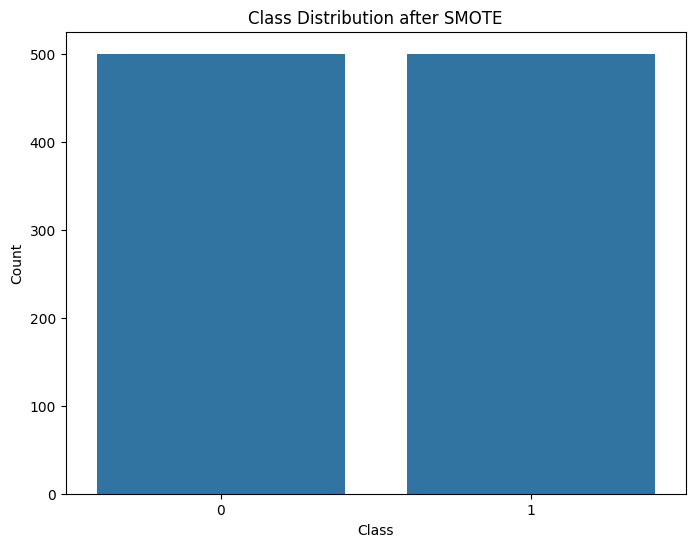

In [ ]:
# Sử dụng SMOTE để tăng số lượng mẫu của lớp thiểu số
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Kiểm tra lại phân phối lớp sau khi áp dụng SMOTE
y_resampled_counts = y_resampled.value_counts()
print("Số lượng mẫu trong mỗi lớp sau khi áp dụng SMOTE:\n", y_resampled_counts)

class_distribution_resampled = y_resampled.value_counts(normalize=True) * 100
print("\nTỷ lệ phần trăm của mỗi lớp sau khi áp dụng SMOTE:\n", class_distribution_resampled)

# Vẽ biểu đồ phân phối lớp sau khi áp dụng SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)
plt.title('Class Distribution after SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
# Chia dữ liệu thành các đặc trưng (features) và nhãn (labels)
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 4. Dự đoán và đánh giá hiệu quả của mô hình
y_pred = clf.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Báo cáo chi tiết hiệu quả mô hình
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82        99
           1       0.80      0.88      0.84       101

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

